In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def autolabel(rects, errors):
    for index, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height - 4),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='white')
        error = height + errors[index]
        ax.annotate('{}'.format(round(error, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, error),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [3]:
error_kw = {'capsize': 5, 'capthick': 1, 'ecolor': 'black'}

In [4]:
medians = np.array([[5.024589, 24.495479, 49.190205],[3.987571, 6.054982, 7.170044],[8.742275, 11.008927, 13.564887],[3.129104, 4.432588, 5.986886]])
percentiles = np.array([[10.166944, 44.713928, 92.989043],[9.993019, 19.227101, 30.651249],[16.374029, 21.901717, 36.744330],[3.709821, 5.160736, 7.018081]])
x_label = ["1 Write", "5 Writes", "10 Writes"]

/Users/tajshaik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


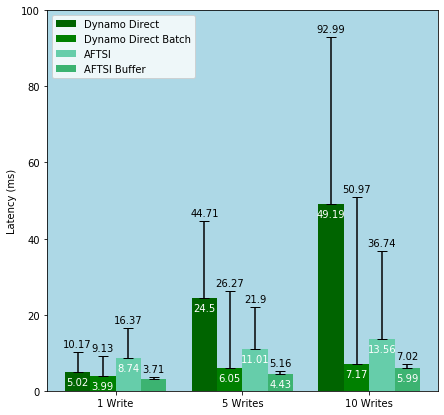

In [5]:
fig, ax = plt.subplots(figsize=(7,7))

width = 0.8
x = np.arange(len(x_label))
ax.set_xticks(x)
ax.set_xticklabels(x_label)

median_dy_direct = medians[0]
percentile_dy_direct = percentiles[0]
error_dy_direct = [np.zeros(len(x_label)), percentile_dy_direct - median_dy_direct]

median_dy_direct_batch = medians[1]
percentile_dy_direct_batch = percentiles[1]
error_dy_direct_batch = [np.zeros(len(x_label)), percentile_dy_direct - median_dy_direct]

median_aftsi = medians[2]
percentile_aftsi = percentiles[2]
error_aftsi = [np.zeros(len(x_label)), percentile_aftsi - median_aftsi]

median_aftsi_buffer = medians[3]
percentile_aftsi_buffer = percentiles[3]
error_aftsi_buffer = [np.zeros(len(x_label)), percentile_aftsi_buffer - median_aftsi_buffer]

plot_dy = ax.bar(x - 3*width/8, median_dy_direct, color='darkgreen', width=width/4, yerr=error_dy_direct, error_kw=error_kw, align='center', label="Dynamo Direct")
autolabel(plot_dy, error_dy_direct[1])

plot_dy = ax.bar(x - width/8, median_dy_direct_batch, color='green', width=width/4, yerr=error_dy_direct_batch, error_kw=error_kw, align='center', label="Dynamo Direct Batch")
autolabel(plot_dy, error_dy_direct_batch[1])

plot_aftsi = ax.bar(x + width/8, median_aftsi, color='mediumaquamarine', width=width/4, yerr=error_aftsi, error_kw=error_kw, align='center', label="AFTSI")
autolabel(plot_aftsi, error_aftsi[1])

plot_aftsi_buffer = ax.bar(x + 3*width/8, median_aftsi_buffer, color='mediumseagreen', width=width/4, yerr=error_aftsi_buffer, error_kw=error_kw, align='center', label="AFTSI Buffer")
autolabel(plot_aftsi_buffer, error_aftsi_buffer[1])

ax.set_ylim(0, 100)
ax.legend()
ax.set_facecolor('lightblue')
ax.set_ylabel("Latency (ms)")

fig.show()
fig.savefig('Graphs/writesvslatency.png')

In [6]:
medians = np.array([22.060884, 21.478617, 30.033525, 25.389258])
percentiles = np.array([47.550546, 47.244204, 69.649711, 60.728138])
x_label = ["Dynamo Direct", "Dynamo Batching", "AFTSI", "AFTSI Buffering"]

/Users/tajshaik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


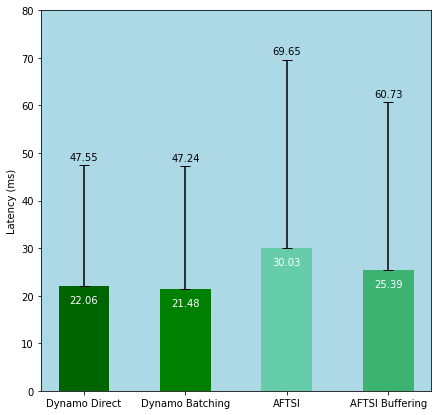

In [7]:
fig, ax = plt.subplots(figsize=(7,7))

width = 0.5
x = np.arange(len(x_label))
ax.set_xticks(x)
ax.set_xticklabels(x_label)

errors = [np.zeros(len(x_label)), percentiles - medians]
errors_dy = [np.zeros(1), [percentiles[0] - medians[0]]]
errors_dy_b = [np.zeros(1), [percentiles[1] - medians[1]]]
errors_aftsi = [np.zeros(1), [percentiles[2] - medians[2]]]
errors_aftsi_b = [np.zeros(1), [percentiles[3] - medians[3]]]

plot_dy = ax.bar(0, medians[0], color='darkgreen', width=width, yerr=errors_dy, error_kw=error_kw, align='center', label="Dynamo Direct")
autolabel(plot_dy, errors_dy[1])

plot_dy_b = ax.bar(1, medians[1], color='green', width=width, yerr=errors_dy_b, error_kw=error_kw, align='center', label="Dynamo Direct")
autolabel(plot_dy_b, errors_dy_b[1])

plot_aftsi = ax.bar(2, medians[2], color='mediumaquamarine', width=width, yerr=errors_aftsi, error_kw=error_kw, align='center', label="Dynamo Direct")
autolabel(plot_aftsi, errors_aftsi[1])

plot_aftsi_b = ax.bar(3, medians[3], color='mediumseagreen', width=width, yerr=errors_aftsi_b, error_kw=error_kw, align='center', label="Dynamo Direct")
autolabel(plot_aftsi_b, errors_aftsi_b[1])

ax.set_ylim(0, 80)
ax.set_facecolor('lightblue')
ax.set_ylabel("Latency (ms)")

fig.show()
fig.savefig('Graphs/latency_twofn.png')

In [8]:
medians = np.array([[42.882110, 42.706827, 39.725585, 37.030785, 34.219715, 31.837466],[7.446715, 14.974386, 22.168230, 29.160213, 36.250658, 30.529831],[14.347123, 21.433669, 30.473405, 38.612328, 45.403399, 46.395837],[5.985393, 16.449884, 25.876039, 35.000384, 43.032493, 47.193852]])
percentiles = np.array([[75.553373, 72.646017, 81.787136, 72.950132, 59.074945, 73.109343],[16.626891, 44.350642, 46.194938, 65.890349, 62.032767, 67.015113],[48.135919, 58.039841, 75.744323, 83.564654, 94.587639, 88.436672],[7.154005, 29.990383, 45.215195, 63.514627, 87.423883, 89.273590]])
x_label = ["0%", "20%", "40%", "60%", "80%", "100%"]

/Users/tajshaik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


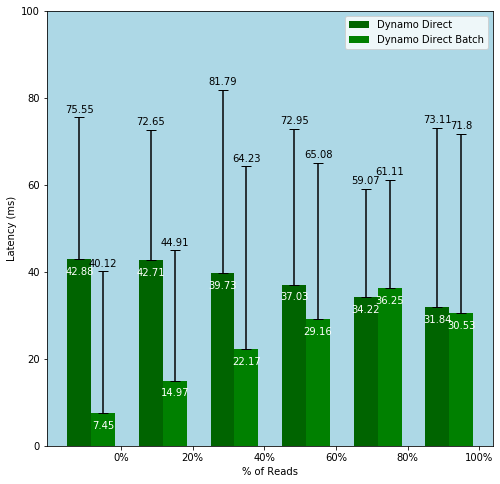

In [19]:
fig, ax = plt.subplots(figsize=(8,8))

width = 1
x = np.arange(len(x_label)) * 1.5

ax.set_xticks(x)
ax.set_xticklabels(x_label)

median_dy_direct = medians[0]
percentile_dy_direct = percentiles[0]
error_dy_direct = [np.zeros(len(x_label)), percentile_dy_direct - median_dy_direct]

median_dy_direct_batch = medians[1]
percentile_dy_direct_batch = percentiles[1]
error_dy_direct_batch = [np.zeros(len(x_label)), percentile_dy_direct - median_dy_direct]


plot_dy = ax.bar(x - 7*width/8, median_dy_direct, color='darkgreen', width=width/2, yerr=error_dy_direct, error_kw=error_kw, align='center', label="Dynamo Direct")
autolabel(plot_dy, error_dy_direct[1])

plot_dy = ax.bar(x - 3*width/8, median_dy_direct_batch, color='green', width=width/2, yerr=error_dy_direct_batch, error_kw=error_kw, align='center', label="Dynamo Direct Batch")
autolabel(plot_dy, error_dy_direct_batch[1])

ax.set_ylim(0, 100)
ax.legend()
ax.set_facecolor('lightblue')
ax.set_ylabel("Latency (ms)")
ax.set_xlabel("% of Reads")

fig.show()
fig.savefig('Graphs/latencypercentage_dynamo.png')

/Users/tajshaik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


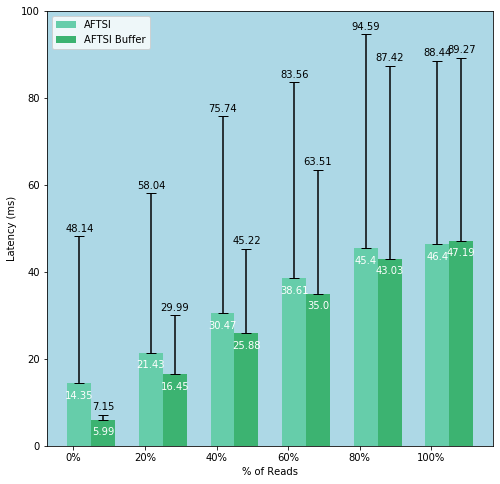

In [18]:
fig, ax = plt.subplots(figsize=(8,8))

width = 1
x = np.arange(len(x_label)) * 1.5

ax.set_xticks(x)
ax.set_xticklabels(x_label)

median_aftsi = medians[2]
percentile_aftsi = percentiles[2]
error_aftsi = [np.zeros(len(x_label)), percentile_aftsi - median_aftsi]

median_aftsi_buffer = medians[3]
percentile_aftsi_buffer = percentiles[3]
error_aftsi_buffer = [np.zeros(len(x_label)), percentile_aftsi_buffer - median_aftsi_buffer]

plot_aftsi = ax.bar(x + width/8, median_aftsi, color='mediumaquamarine', width=width/2, yerr=error_aftsi, error_kw=error_kw, align='center', label="AFTSI")
autolabel(plot_aftsi, error_aftsi[1])

plot_aftsi_buffer = ax.bar(x + 5*width/8, median_aftsi_buffer, color='mediumseagreen', width=width/2, yerr=error_aftsi_buffer, error_kw=error_kw, align='center', label="AFTSI Buffer")
autolabel(plot_aftsi_buffer, error_aftsi_buffer[1])

ax.set_ylim(0, 100)
ax.legend()
ax.set_facecolor('lightblue')
ax.set_ylabel("Latency (ms)")
ax.set_xlabel("% of Reads")

fig.show()
fig.savefig('Graphs/latencypercentage_aftsi.png')